In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
from sklearn.preprocessing import PolynomialFeatures
train_x = pd.read_csv('data/classificaition_train_x.csv')
train_y = pd.read_csv('data/classificaition_train_y.csv')
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')
train = pd.concat([train_x, train_y], axis = 1)
val = pd.concat([val_x, val_y], axis =1)
train = pd.concat([train, val], ignore_index = True)

In [4]:
def catagorize(df):
    catags = []
    for col in list(df.columns):
        if(type(df[col][0])==str):
            catags.append(col)
    cols = list(df.columns)
    quant = [i for i in cols if i not in catags]
    return (catags, quant)

In [5]:
(cata, quant) = catagorize(train)
print(cata)
print(quant)
sns.set(style="ticks", color_codes=True)

['f1', 'f2', 'f3', 'f4', 'f7', 'f8', 'f9', 'f12', 'f17', 'f20']
['f5', 'f6', 'f10', 'f11', 'f13', 'f14', 'f15', 'f16', 'f18', 'f19', 'y']


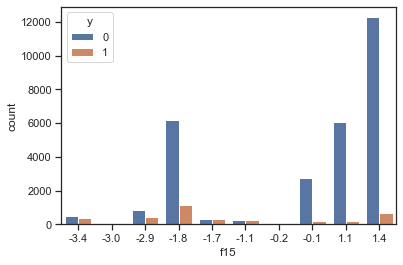

In [6]:
sns.countplot(hue = 'y', x = 'f15', data = train)

In [7]:
def remove_unknown(df):
    remove = [('f3', 'c1'), ('f4', 'c4'), ('f9', 'c3')]
    for r in remove:
        df = df[df[r[0]] != r[1]]
    return df

In [8]:
train = remove_unknown(train)

In [9]:
train['y']
train['f5_bin'] = pd.qcut(train['f5'], [0, .2, .4, .6, .8, 1], labels=['c0', 'c1','c2','c3', 'c4'])
train['f6_bin'] = pd.qcut(train['f5'], [0, .2, .4, .6, .8, 1], labels=['c0', 'c1','c2','c3', 'c4'])
train['f10_bin'] = pd.cut(train['f10'],[-2,0,100,300,600,900],labels=['c0', 'c1','c2','c3', 'c4'])
train['f11_bin'] = pd.cut(train['f11'], [0, 5099.1, 5191, 5227, 9999], labels=['c0', 'c1','c2','c3'])
train['f13_bin'] = pd.cut(train['f10'],[-2,0,100,300,600,900],labels=['c0', 'c1','c2','c3', 'c4'])
train['f15_bin'] = pd.cut(train['f15'],[-4, -2.9,-1.8,-0.2,-0.1,1.1,2],labels=['c0', 'c1','c2','c3', 'c4', 'c5'])

In [10]:
for col in train.select_dtypes(include ='object').columns:
    train[col] = train[col].astype('category')

print(train.head(5))

    f1  f2  f3  f4  f5  f6  f7  f8  f9    f10  ...  f18 f19  f20  y  f5_bin  \
0  c11  c0  c0  c7  53   1  c0  c3  c2  899.1  ...  343   0   c6  0      c4   
1   c5  c1  c2  c0  48  17  c1  c0  c1  899.1  ...   27   0   c6  0      c3   
2   c0  c0  c0  c6  29   1  c0  c2  c2  899.1  ...  401   1   c4  0      c0   
3   c1  c0  c0  c2  25   2  c1  c3  c2  899.1  ...  212   0   c6  0      c0   
4   c6  c0  c0  c6  40   3  c0  c0  c2  899.1  ...  379   0   c3  0      c2   

   f6_bin f10_bin  f11_bin  f13_bin f15_bin  
0      c4      c4       c3       c4      c5  
1      c3      c4       c3       c4      c5  
2      c0      c4       c0       c4      c1  
3      c0      c4       c3       c4      c5  
4      c2      c4       c0       c4      c1  

[5 rows x 27 columns]


In [11]:
df_bin = train.drop(['f5', 'f5' , 'f10' , 'f11', 'f13','f15'], axis=1)

In [12]:
for col in train.select_dtypes(include ='object').columns:
    train[col] = train[col].astype('category')

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

## keep a copy of original data set
bank_df_prev = train.copy()

## keep a copy to use for One hot encoding
bank_df_OHE = train.copy()

for col in train.select_dtypes(include ='category').columns:
    # Encode data in dataframe 'bank_df'. 
    train[col]= label_encoder.fit_transform(train[col])
    
for col in bank_df_OHE.select_dtypes(include ='category').columns:
    ## also do one hot encoding on the other data frame
    col_prefix = col + '_'
    bank_df_OHE = pd.concat([bank_df_OHE,pd.get_dummies(bank_df_OHE[col], prefix=col_prefix)],axis=1)
    # now drop the original col
    bank_df_OHE.drop([col],axis=1, inplace=True)
print(train.head(5))

   f1  f2  f3  f4  f5  f6  f7  f8  f9    f10  ...  f18  f19  f20  y  f5_bin  \
0   3   0   0   6  53   1   0   3   2  899.1  ...  343    0    6  0       4   
1   7   1   1   0  48  17   1   0   1  899.1  ...   27    0    6  0       3   
2   0   0   0   5  29   1   0   2   2  899.1  ...  401    1    4  0       0   
3   1   0   0   2  25   2   1   3   2  899.1  ...  212    0    6  0       0   
4   8   0   0   5  40   3   0   0   2  899.1  ...  379    0    3  0       2   

   f6_bin  f10_bin  f11_bin  f13_bin  f15_bin  
0       4        2        3        2        5  
1       3        2        3        2        5  
2       0        2        0        2        1  
3       0        2        3        2        5  
4       2        2        0        2        1  

[5 rows x 27 columns]


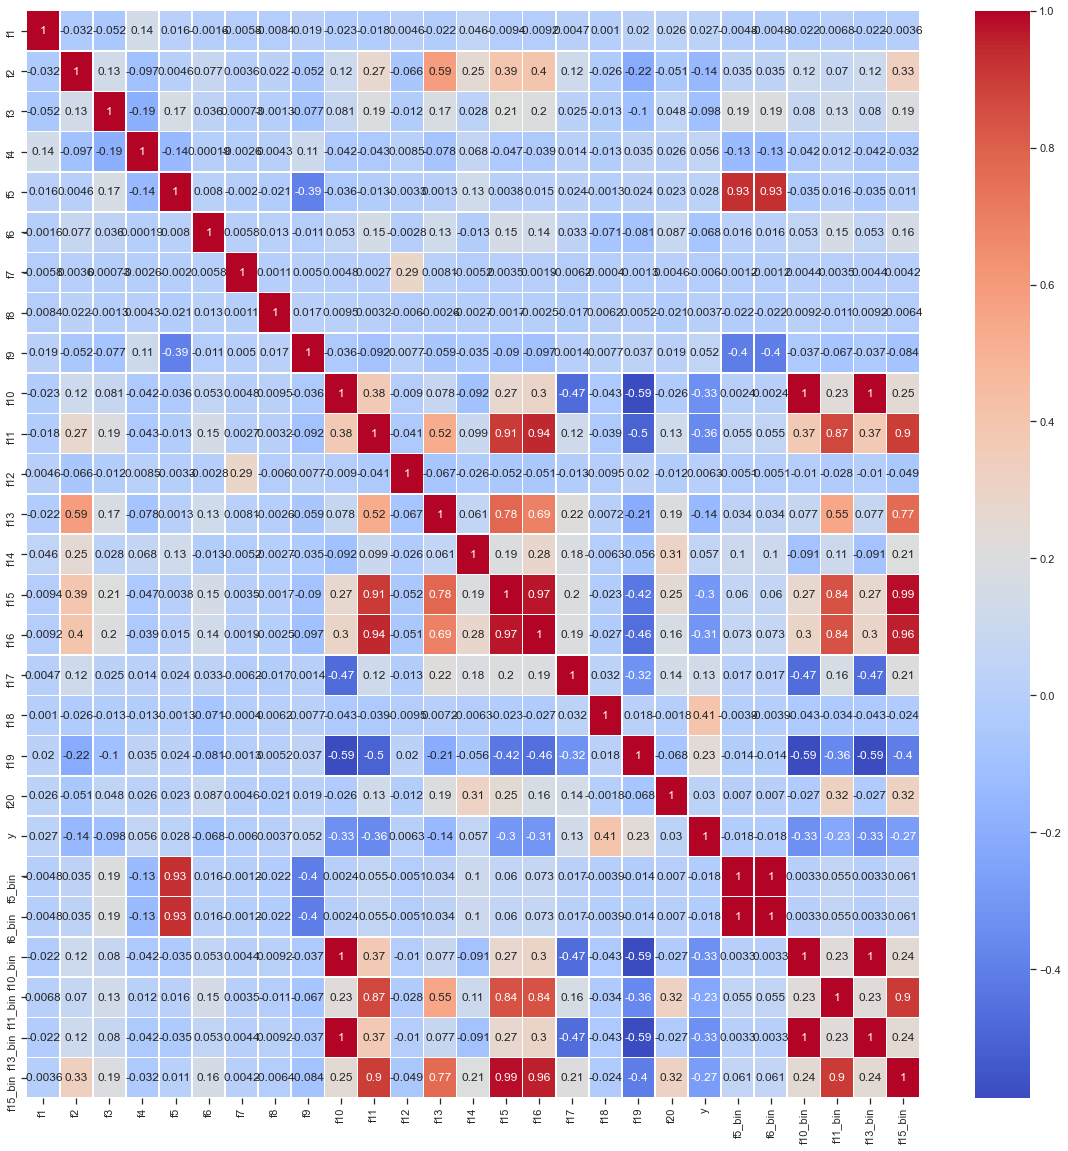

In [14]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
## plot heat map
sns.heatmap(train[top_corr_features].corr(),cmap= "coolwarm",annot=True,linewidth=0.5)

[0.05222841 0.01255772 0.01103965 0.05115824 0.06661192 0.0548671
 0.02143391 0.04832832 0.0293853  0.03621415 0.03400964 0.0308994
 0.01874643 0.02136116 0.02543595 0.08364577 0.02044073 0.24838603
 0.01188346 0.01721652 0.02309646 0.02290779 0.01189989 0.01003395
 0.02022831 0.01598382]


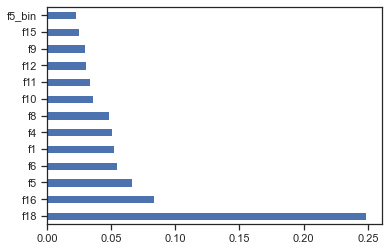

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features_X = train.drop('y', axis=1)
label_y = train.y   #target column 

#apply SelectKBest class to extract top 10 best features

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(features_X,label_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features_X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()
selected_feature = ['y', 'f18', 'f16', 'f5', 'f6', 'f1', 'f4', 'f8', 'f11', 'f10', 'f12', 'f9']

In [16]:
#from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## create methods for various activities:

######################################
#                                    #
#   Function to split the dataset    #
#                                    #
######################################

def splitdataset(data_df, label, t_size):
         # Seperating the target variable
    data_df.head()
    Y = data_df[label]
    data_df.drop(label,axis=1,inplace=True)
    X = data_df
    #print ("inside split data set", Y.unique())  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = t_size, random_state = 100) 
    #print ("inside split data set###")    
    return X, Y, X_train, X_test, y_train, y_test



## balance the class (input argument under sample, over sample)

#################################################
#                                               #
#   this function creates a balanced class by   #
#   selecting same number of records from the   #
#   imbalanced class                            #
#                                               #
#################################################
## this function creates a balanced class by selecting same number of records from the imbalanced class
def underSampling (data_df):

    print ("Inside Undersampling")
    # Lets shuffle the data before creating the subsamples
    data_df.sample(frac=1)
    print(data_df.info())
    # count the number of records having personal loan as 1 from the dataframe 
    count = data_df[data_df['y'] == 1]['y'].count()
    # match and select same number of records for both the targets.
    outcome_True_df     = data_df.loc[data_df['y'] == 1]
    outcome_False_df    = data_df.loc[data_df['y'] == 0][:count]
    #merge the classes with equal number of records
    normal_distributed_df = pd.concat([outcome_True_df, outcome_False_df])
    # Shuffle dataframe rows
    balanced_df = normal_distributed_df.sample(frac=1, random_state=42)
    return balanced_df;

#################################################
#                                               #
#   this function creates a balanced class by   #
#   synthesising records using SMOTE generating #
#   same number of records from the imbalanced  #
#   class                                       #
#                                               #
#################################################
def overSamplingSMOTE(X_train,y_train):
    
    print("Number transactions X_train dataset: ", X_train.shape)
    print("Number transactions y_train dataset: ", y_train.shape)
    

    print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    print ("--------------------------------------------------------------------------------------")
    print ("--------------------------------------------------------------------------------------")
    return X_train_res, y_train_res;

## encode the data (label, one hot encoding)

def encodingCategory(data_df,type_Encoding):
    from sklearn import preprocessing
    from sklearn.preprocessing import OneHotEncoder
    
    if type_Encoding == 'label':
        label_encoder = preprocessing.LabelEncoder()
        for col in data_df.select_dtypes(include ='category').columns:
            data_df[col]= label_encoder.fit_transform(data_df[col])
    elif type_Encoding == 'onehot':
        onehotencoder = OneHotEncoder()
        cat_cols = data_df.select_dtypes(include ='category').columns
        df_processed = pd.get_dummies(df, prefix_sep="__",columns=cat_cols)
    return df_processed
        

## decision trees

# Function to perform Decision Tree training. 
def train_Decision(X_train, X_test, y_train, criterion, depth, leaf): 
    # Creating the classifier object 
    clf = DecisionTreeClassifier(criterion = criterion,random_state = 100,class_weight='balanced',max_depth=depth, min_samples_leaf=leaf) 
  
    # Performing training 
    clf.fit(X_train, y_train) 
    return clf

# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        metrics.confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    metrics.accuracy_score(y_test,y_pred)*100) 
    
    print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)))
    print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
      
    print("Report : ", 
    metrics.classification_report(y_test, y_pred))
    
    

In [17]:
feature_cols  = ['y', 'f18', 'f16', 'f5', 'f6', 'f1', 'f4', 'f8', 'f11', 'f10', 'f12', 'f9']

new_df = train[selected_feature]
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32866 entries, 0 to 32949
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       32866 non-null  int64  
 1   f18     32866 non-null  int64  
 2   f16     32866 non-null  float64
 3   f5      32866 non-null  int64  
 4   f6      32866 non-null  int64  
 5   f1      32866 non-null  int64  
 6   f4      32866 non-null  int64  
 7   f8      32866 non-null  int64  
 8   f11     32866 non-null  float64
 9   f10     32866 non-null  float64
 10  f12     32866 non-null  int64  
 11  f9      32866 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.3 MB


In [18]:
    from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

label = "y"
t_size = 0.3 #Set the split ratio to 70:30
# split the data set
X, Y, X_train, X_test, y_train, y_test = splitdataset(train[feature_cols],label,t_size)

# Try with polynomial features (1,2,3) - to increase the number of features
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)
print(X_train.shape)
X_train_poly1 = poly_features_1.fit_transform(X_train)
X_train_poly2 = poly_features_2.fit_transform(X_train)
X_train_poly3 = poly_features_3.fit_transform(X_train)


logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_train)
y_test_pred = logisticRegr.predict(poly_features_1.fit_transform(X_test))
cal_accuracy(y_test, y_test_pred) 
print(log_loss(y_test, y_test_pred)) 

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_train)
y_test_pred = logisticRegr.predict(poly_features_2.fit_transform(X_test))
cal_accuracy(y_test, y_test_pred) 
print(log_loss(y_test, y_test_pred)) 

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_train)
y_test_pred = logisticRegr.predict(poly_features_3.fit_transform(X_test))
cal_accuracy(y_test, y_test_pred)
print(log_loss(y_test, y_test_pred)) 

(23006, 11)
Confusion Matrix:  [[8556  174]
 [ 750  380]]
Accuracy :  90.6288032454361
Recall: 0.34
Precision: 0.69
Report :                precision    recall  f1-score   support

           0       0.92      0.98      0.95      8730
           1       0.69      0.34      0.45      1130

    accuracy                           0.91      9860
   macro avg       0.80      0.66      0.70      9860
weighted avg       0.89      0.91      0.89      9860

3.2367108031288367
Confusion Matrix:  [[8500  230]
 [ 674  456]]
Accuracy :  90.8316430020284
Recall: 0.40
Precision: 0.66
Report :                precision    recall  f1-score   support

           0       0.93      0.97      0.95      8730
           1       0.66      0.40      0.50      1130

    accuracy                           0.91      9860
   macro avg       0.80      0.69      0.73      9860
weighted avg       0.90      0.91      0.90      9860

3.1666569744835913
Confusion Matrix:  [[8510  220]
 [ 699  431]]
Accuracy :  90.6795131

In [19]:


new_df = train[feature_cols].copy()
label = "y"
t_size = 0.3 #Set the split ratio to 70:30
# split the data set
X, Y, X_train_s, X_test_s, y_train_s, y_test_s = splitdataset(new_df,label,t_size)
# oversample the training data
X_train_s,y_train_s = overSamplingSMOTE (X_train_s,y_train_s)

# Try with polynomial features (1)
poly_features_1 = PolynomialFeatures(degree=1)


X_train_poly1_S = poly_features_1.fit_transform(X_train_s)

logisticRegr_S = LogisticRegression()
logisticRegr_S.fit(X_train_poly1_S, y_train_s)
y_pred = logisticRegr_S.predict(poly_features_1.fit_transform(X_test_s))
cal_accuracy(y_test_s, y_pred)
print(log_loss(y_test_s, y_pred)) 

Number transactions X_train dataset:  (23006, 11)
Number transactions y_train dataset:  (23006,)
Before OverSampling, counts of label '1': 2589
Before OverSampling, counts of label '0': 20417 

After OverSampling, the shape of train_X: (40834, 11)
After OverSampling, the shape of train_y: (40834,) 

After OverSampling, counts of label '1': 20417
After OverSampling, counts of label '0': 20417
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
Confusion Matrix:  [[7391 1339]
 [ 227  903]]
Accuracy :  84.11764705882354
Recall: 0.80
Precision: 0.40
Report :                precision    recall  f1-score   support

           0       0.97      0.85      0.90      8730
           1       0.40      0.80      0.54      1130

    accuracy                           0.84      9860
   macro avg       0.69      0.82      0.72      9860
weighted avg       0.91      0.84      0.86 

In [20]:


new_df = train[feature_cols].copy()
label = "y"
# undersample the train data
new_df = underSampling(new_df)
#split the train and test data
X, Y, X_train, X_test, y_train, y_test = splitdataset(new_df,label,t_size)  
criterion = "entropy" # "gini"#
depth_of_tree =11
sample_leaf  = 3
clf_u_sample = train_Decision(X_train, X_test, y_train,criterion,depth_of_tree,sample_leaf) 
 
# Operational Phase 
print("Results Using Decision Tree (Undersampled):") 
      
# Prediction using gini 
y_pred = prediction(X_test, clf_u_sample) 
cal_accuracy(y_test, y_pred)
print(log_loss(y_test, y_pred))

Inside Undersampling
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32866 entries, 0 to 32949
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       32866 non-null  int64  
 1   f18     32866 non-null  int64  
 2   f16     32866 non-null  float64
 3   f5      32866 non-null  int64  
 4   f6      32866 non-null  int64  
 5   f1      32866 non-null  int64  
 6   f4      32866 non-null  int64  
 7   f8      32866 non-null  int64  
 8   f11     32866 non-null  float64
 9   f10     32866 non-null  float64
 10  f12     32866 non-null  int64  
 11  f9      32866 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.3 MB
None
Results Using Decision Tree (Undersampled):
Predicted values:
[0 1 1 ... 1 1 1]
Confusion Matrix:  [[916 194]
 [149 973]]
Accuracy :  84.6326164874552
Recall: 0.87
Precision: 0.83
Report :                precision    recall  f1-score   support

           0       0.86      0.83      0.84      111

In [21]:
from sklearn.svm import SVC
clf = SVC (C=1.0, cache_size=200, class_weight='balanced')

new_df = train[feature_cols].copy()

X, Y, X_train, X_test, y_train, y_test = splitdataset(new_df,label,t_size)
X_train_s,y_train_s = overSamplingSMOTE (X_train,y_train)

print ("######### Unsampled data SVM ########### ")
model = clf.fit(X_train, y_train)
y_pred = prediction(X_test, model) 
cal_accuracy(y_test, y_pred)

print ("######### Oversampled data Bagging Classifier ########### ")
## use Oversampled data (imbalanced classes)
model = model.fit(X_train_s, y_train_s)
y_pred_s = prediction(X_test, model) 
cal_accuracy(y_test, y_pred_s)

Number transactions X_train dataset:  (23006, 11)
Number transactions y_train dataset:  (23006,)
Before OverSampling, counts of label '1': 2589
Before OverSampling, counts of label '0': 20417 

After OverSampling, the shape of train_X: (40834, 11)
After OverSampling, the shape of train_y: (40834,) 

After OverSampling, counts of label '1': 20417
After OverSampling, counts of label '0': 20417
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
######### Unsampled data SVM ########### 
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[7395 1335]
 [ 173  957]]
Accuracy :  84.70588235294117
Recall: 0.85
Precision: 0.42
Report :                precision    recall  f1-score   support

           0       0.98      0.85      0.91      8730
           1       0.42      0.85      0.56      1130

    accuracy                           0.85      9860
   macro avg       0

In [22]:
new_df = train[feature_cols].copy()
label = "y"
# undersample the train data
new_df = underSampling(new_df)
#split the train and test data
X, Y, X_train, X_test, y_train, y_test = splitdataset(new_df,label,t_size)  
criterion = "entropy" # "gini"#
depth_of_tree =11
sample_leaf  = 3
clf_u_sample = train_Decision(X_train, X_test, y_train,criterion,depth_of_tree,sample_leaf) 
 
# Operational Phase 
print("Results Using Decision Tree (Undersampled):") 
      
# Prediction using gini 
y_pred = prediction(X_test, clf_u_sample) 
cal_accuracy(y_test, y_pred)

Inside Undersampling
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32866 entries, 0 to 32949
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       32866 non-null  int64  
 1   f18     32866 non-null  int64  
 2   f16     32866 non-null  float64
 3   f5      32866 non-null  int64  
 4   f6      32866 non-null  int64  
 5   f1      32866 non-null  int64  
 6   f4      32866 non-null  int64  
 7   f8      32866 non-null  int64  
 8   f11     32866 non-null  float64
 9   f10     32866 non-null  float64
 10  f12     32866 non-null  int64  
 11  f9      32866 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.3 MB
None
Results Using Decision Tree (Undersampled):
Predicted values:
[0 1 1 ... 1 1 1]
Confusion Matrix:  [[916 194]
 [149 973]]
Accuracy :  84.6326164874552
Recall: 0.87
Precision: 0.83
Report :                precision    recall  f1-score   support

           0       0.86      0.83      0.84      111

In [23]:
from sklearn.ensemble import RandomForestClassifier
new_df = train[feature_cols].copy()
label = "y"

## split the data train and test and oversample
X, Y, X_train, X_test, y_train, y_test = splitdataset(new_df,label,t_size)
X_train_s,y_train_s = overSamplingSMOTE (X_train,y_train)
rfcl_OverSample = RandomForestClassifier(n_estimators = len(feature_cols))

## fit the model and predict for Oversample data
rfcl_OS = rfcl_OverSample.fit(X_train_s, y_train_s)
y_pred_s = prediction(X_test_s, rfcl_OS) 
cal_accuracy(y_test_s, y_pred_s)

## fit the model and predict for No Sample data
print ("#### NO SAMPLING DONE ###")
rfcl_OS = rfcl_OverSample.fit(X_train, y_train)
y_pred_s = prediction(X_test_s, rfcl_OS) 
cal_accuracy(y_test_s, y_pred_s)

### fit the model for undersampled data
label = "y"

new_df = train[feature_cols].copy()
new_df = underSampling(new_df)
#new_df.head()
X, Y, X_train_u, X_test_u, y_train_u, y_test_u = splitdataset(new_df,label,t_size)
print ("#### UNder Sampling DONE ###")
rfcl_OS = rfcl_OverSample.fit(X_train_u, y_train_u)
y_pred_u = prediction(X_test_u, rfcl_OS) 
cal_accuracy(y_test_u, y_pred_u)


Number transactions X_train dataset:  (23006, 11)
Number transactions y_train dataset:  (23006,)
Before OverSampling, counts of label '1': 2589
Before OverSampling, counts of label '0': 20417 

After OverSampling, the shape of train_X: (40834, 11)
After OverSampling, the shape of train_y: (40834,) 

After OverSampling, counts of label '1': 20417
After OverSampling, counts of label '0': 20417
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[8160  570]
 [ 394  736]]
Accuracy :  90.22312373225152
Recall: 0.65
Precision: 0.56
Report :                precision    recall  f1-score   support

           0       0.95      0.93      0.94      8730
           1       0.56      0.65      0.60      1130

    accuracy                           0.90      9860
   macro avg       0.76      0.79      0.77      9860
weighted

In [24]:
test_x = pd.read_csv('data/classificaition_test_x.csv')

test_x['f5_bin'] = pd.qcut(test_x['f5'], [0, .2, .4, .6, .8, 1], labels=['c0', 'c1','c2','c3', 'c4'])
test_x['f6_bin'] = pd.qcut(test_x['f5'], [0, .2, .4, .6, .8, 1], labels=['c0', 'c1','c2','c3', 'c4'])
test_x['f10_bin'] = pd.cut(test_x['f10'],[-2,0,100,300,600,900],labels=['c0', 'c1','c2','c3', 'c4'])
test_x['f11_bin'] = pd.cut(test_x['f11'], [0, 5099.1, 5191, 5227, 9999], labels=['c0', 'c1','c2','c3'])
test_x['f13_bin'] = pd.cut(test_x['f10'],[-2,0,100,300,600,900],labels=['c0', 'c1','c2','c3', 'c4'])
test_x['f15_bin'] = pd.cut(test_x['f15'],[-4, -2.9,-1.8,-0.2,-0.1,1.1,2],labels=['c0', 'c1','c2','c3', 'c4', 'c5'])
for col in test_x.select_dtypes(include ='object').columns:
    test_x[col] = test_x[col].astype('category')

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in test_x.select_dtypes(include ='category').columns:
    # Encode data in dataframe 'bank_df'. 
    test_x[col]= label_encoder.fit_transform(test_x[col])

print(test_x.info())
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
print(feature_cols)
test_x = test_x[[ 'f18', 'f16', 'f5', 'f6', 'f1', 'f4', 'f8', 'f11', 'f10', 'f12', 'f9']]
# Try with polynomial features (1,2,3) - to increase the number of features
# poly_features_1 = PolynomialFeatures(degree=1)
# poly_features_2 = PolynomialFeatures(degree=2)
# X_train_poly2 = poly_features_2.fit_transform(new_df.drop('y', axis=1))
# 
# logisticRegr = LogisticRegression()
# logisticRegr.fit(X_train_poly2, new_df.y)
# y_test_pred = logisticRegr.predict(poly_features_2.fit_transform(test_x))
# Try with polynomial features (1,2,3) - to increase the number of features
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

X_train_poly1 = poly_features_1.fit_transform(new_df.drop('y', axis=1))
X_train_poly2 = poly_features_2.fit_transform(new_df.drop('y', axis=1))
X_train_poly3 = poly_features_3.fit_transform(new_df.drop('y', axis=1))


logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, new_df.y)
y_test_pred = logisticRegr.predict(poly_features_1.fit_transform(test_x))
test_y_prob_pd = pd.DataFrame(y_test_pred, columns=["y"])
test_y_prob_pd.to_csv('test1.csv', index_label='id')

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, new_df.y)
y_test_pred = logisticRegr.predict(poly_features_2.fit_transform(test_x))
test_y_prob_pd = pd.DataFrame(y_test_pred, columns=["y"])
test_y_prob_pd.to_csv('test2.csv', index_label='id')

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, new_df.y)
y_test_pred = logisticRegr.predict(poly_features_3.fit_transform(test_x))

test_y_prob_pd = pd.DataFrame(y_test_pred, columns=["y"])
test_y_prob_pd.to_csv('test3.csv', index_label='id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       8238 non-null   int64  
 1   f2       8238 non-null   int64  
 2   f3       8238 non-null   int64  
 3   f4       8238 non-null   int64  
 4   f5       8238 non-null   int64  
 5   f6       8238 non-null   int64  
 6   f7       8238 non-null   int64  
 7   f8       8238 non-null   int64  
 8   f9       8238 non-null   int64  
 9   f10      8238 non-null   float64
 10  f11      8238 non-null   float64
 11  f12      8238 non-null   int64  
 12  f13      8238 non-null   float64
 13  f14      8238 non-null   float64
 14  f15      8238 non-null   float64
 15  f16      8238 non-null   float64
 16  f17      8238 non-null   int64  
 17  f18      8238 non-null   int64  
 18  f19      8238 non-null   int64  
 19  f20      8238 non-null   int64  
 20  f5_bin   8238 non-null   int64  
 21  f6_bin   8238 

KeyError: "['y'] not found in axis"

In [ ]:
test_y_prob_pd = pd.DataFrame(y_test_pred, columns=["y"])
test_y_prob_pd.to_csv('test.csv', index_label='id')